<a href="https://colab.research.google.com/github/jennykon1715/Weather-predict/blob/main/predict_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

weather = pd.read_csv("3689003.csv", index_col="DATE")

weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,15.43,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,9.84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#fix any missing value
weather.apply(pd.isnull).sum()/weather.shape[0] #chnage to percentage to easier to look

STATION    0.000000
NAME       0.000000
ACMH       0.669681
ACSH       0.669681
AWND       0.497796
DAPR       0.999548
FMTM       0.876215
FRGT       0.999887
MDPR       0.999548
PGTM       0.518822
PRCP       0.016052
SNOW       0.356771
SNWD       0.349763
TAVG       0.884863
TMAX       0.000622
TMIN       0.000791
TSUN       0.934942
WDF1       0.669681
WDF2       0.497739
WDF5       0.502770
WDFG       0.758818
WSF1       0.669681
WSF2       0.497683
WSF5       0.502770
WSFG       0.758818
WT01       0.776000
WT02       0.980217
WT03       0.992426
WT04       0.999774
WT05       0.998361
WT07       0.999887
WT08       0.816527
WT09       0.999887
WT16       0.889498
WT18       0.999830
dtype: float64

In [5]:
#copy a new data and rename it
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

core_weather.columns = ["Precip", "Snow", "Snow_depth", "Temp_Max", "Temp_Min"]

core_weather

,Precip,Snow,Snow_depth,Temp_Max,Temp_Min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2024-05-05,0.0,NaN,NaN,62.0,48.0
2024-05-06,0.0,NaN,NaN,64.0,43.0
2024-05-07,0.0,NaN,NaN,68.0,45.0


In [6]:
#filling in missing values

core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

Precip        0.016052
Snow          0.356771
Snow_depth    0.349763
Temp_Max      0.000622
Temp_Min      0.000791
dtype: float64

In [7]:
core_weather["Snow"].value_counts()
#Find out how many days snow

Snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [8]:
del core_weather["Snow"]
#there is only one day, it doesn't useful

In [9]:
#how about snow depth?
core_weather["Snow_depth"].value_counts()

Snow_depth
0.0    11504
Name: count, dtype: int64

In [10]:
#also doesn't useful
del core_weather["Snow_depth"]

In [11]:
core_weather[pd.isnull(core_weather["Precip"])]

,Precip,Temp_Max,Temp_Min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


In [12]:
#before and after

core_weather.loc["1983-10-20":"1983-11-05",:]

,Precip,Temp_Max,Temp_Min
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [13]:
core_weather["Precip"].value_counts() #from the result we know that most of days are o precip

Precip
0.00    14354
0.01      445
0.02      205
0.03      126
0.05      105
        ...  
1.38        1
1.95        1
2.01        1
1.41        1
1.28        1
Name: count, Length: 179, dtype: int64

In [14]:
core_weather["Precip"] = core_weather["Precip"].fillna(0)
# decided to assume the missing value precip is 0

In [15]:
core_weather[pd.isnull(core_weather["Temp_Max"])]

,Precip,Temp_Max,Temp_Min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [16]:
core_weather[pd.isnull(core_weather["Temp_Min"])]

,Precip,Temp_Max,Temp_Min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [17]:
#use the previous value to replace the nan
core_weather = core_weather.fillna(method="ffill")

In [18]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0] #now we have no missing value

Precip      0.0
Temp_Max    0.0
Temp_Min    0.0
dtype: float64

In [19]:
#verifying we have the correct data types

core_weather.dtypes

Precip      float64
Temp_Max    float64
Temp_Min    float64
dtype: object

In [20]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04',
       '2024-05-05', '2024-05-06', '2024-05-07', '2024-05-08', '2024-05-09'],
      dtype='object', name='DATE', length=17692)

In [21]:
core_weather.index = pd.to_datetime(core_weather.index)

In [22]:
core_weather.index #dtype=datetime

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-04-30', '2024-05-01', '2024-05-02', '2024-05-03',
               '2024-05-04', '2024-05-05', '2024-05-06', '2024-05-07',
               '2024-05-08', '2024-05-09'],
              dtype='datetime64[ns]', name='DATE', length=17692, freq=None)

In [24]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=17692)

In [25]:
core_weather.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype='int32', name='DATE', length=17692)

In [29]:
#make sure columns don't have any 9999 (missing data)
core_weather.apply(lambda x: (x==9999).sum())

Precip      0
Temp_Max    0
Temp_Min    0
dtype: int64

<Axes: xlabel='DATE'>

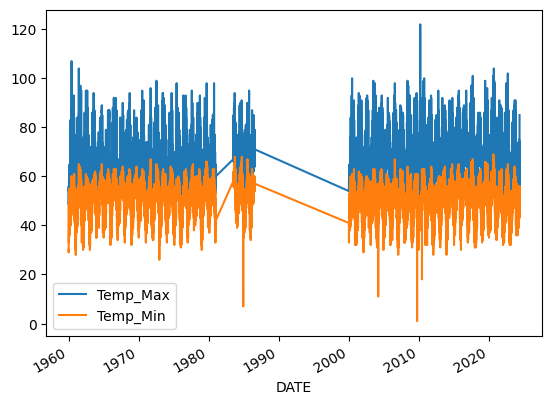

In [34]:
#Analyzing our weather data

core_weather[["Temp_Max", "Temp_Min"]].plot()

In [36]:
core_weather.index.year.value_counts().sort_index() #this will tell us how many observations exsist for wach year/ sort by year

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    130
Name: count, dtype: int64

<Axes: xlabel='DATE'>

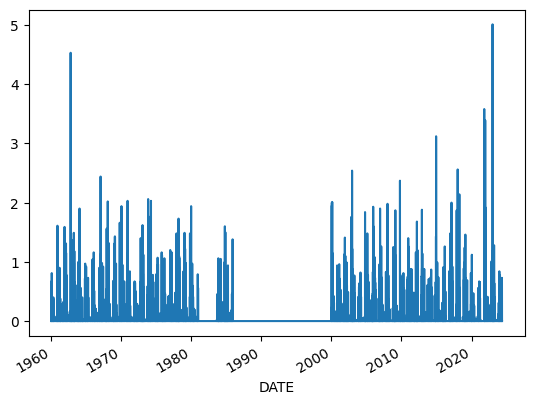

In [38]:
core_weather["Precip"].plot()

In [41]:
#how much the it rained each year
core_weather.groupby(core_weather.index.year).sum()["Precip"]

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022    15.38
2023    20.98
2024    12.35
Name: Precip, dtype: float64

In [43]:
#Training our first machine learning tools
#try to predict tomorrows max temp using historical data

core_weather["target"] = core_weather.shift(-1)["Temp_Max"] #pull every row back one position

In [44]:
core_weather

,Precip,Temp_Max,Temp_Min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2024-05-05,0.0,62.0,48.0,64.0
2024-05-06,0.0,64.0,43.0,68.0
2024-05-07,0.0,68.0,45.0,81.0


In [47]:
core_weather = core_weather.iloc[:-1,:].copy()

In [48]:
core_weather

,Precip,Temp_Max,Temp_Min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2024-05-03,0.00,68.0,52.0,56.0
2024-05-04,0.73,56.0,49.0,62.0
2024-05-05,0.00,62.0,48.0,64.0


In [50]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [52]:
predictors = ["Precip","Temp_Max", "Temp_Min"]

In [54]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [55]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [56]:
predictions = reg.predict(test[predictors])

In [57]:
from sklearn.metrics import mean_absolute_error

#subtract the actual from the predictions take the absolute value and find the average of that across all of the predictors
mean_absolute_error(test["target"], predictions) #means on average, we will got about 3.4 degrees off the actual temperature

3.224122063009257

In [63]:
#Evaluating our model
combined =  pd.concat([test ["target"], pd.Series(predictions, index=test.index)], axis=1)

combined.columns = ["actual", "predictions"]

In [64]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2024-05-03,56.0,67.731416
2024-05-04,62.0,56.927353
2024-05-05,64.0,62.685824


<Axes: xlabel='DATE'>

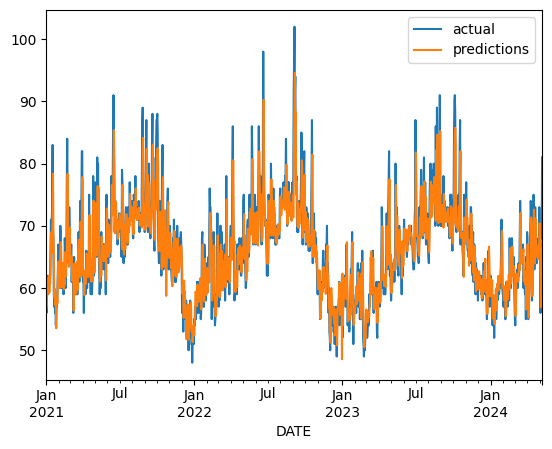

In [65]:
combined.plot()

In [66]:
#to see how the different variables are being used by the model
reg.coef_
#from the result, we know precipiration has a negative impact on temp

array([-2.20730384,  0.72113834,  0.17969047])

In [68]:
#creating a function to make predictions

def create_predictions(predictors, core_weather, reg):
  train = core_weather.loc[:"2020-12-31"]
  test = core_weather.loc["2021-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined =  pd.concat([test ["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error, combined

In [69]:
#Adding in rolling means
core_weather["month_max"] = core_weather["Temp_Max"].rolling(30).mean()

In [70]:
core_weather

,Precip,Temp_Max,Temp_Min,target,month_max
DATE,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN
1960-01-02,0.00,49.0,29.0,54.0,NaN
1960-01-03,0.00,54.0,35.0,54.0,NaN
1960-01-04,0.00,54.0,36.0,55.0,NaN
1960-01-05,0.00,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2024-05-03,0.00,68.0,52.0,56.0,65.966667
2024-05-04,0.73,56.0,49.0,62.0,66.000000
2024-05-05,0.00,62.0,48.0,64.0,66.133333


In [78]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["Temp_Max"]

In [79]:
core_weather["max_min"] = core_weather["Temp_Max"] / core_weather["Temp_Min"]

In [80]:
predictors = ["Precip", "Temp_Max", "Temp_Min", "month_max", "month_day_max", "max_min"]

In [97]:
core_weather = core_weather.iloc[30:,:].copy()

In [98]:
error, combined = create_predictions (predictors, core_weather, reg)

In [83]:
error #on average, we got 3.14 fahrenheit away from predicting the actual temp for tomorrow

3.1472454387294637

<Axes: xlabel='DATE'>

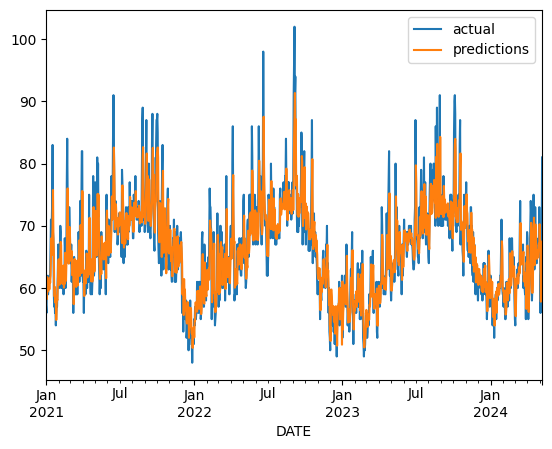

In [99]:
combined.plot()